In [1]:
# Put one image into another one
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainlogo.png')


In [2]:
# here bgr colors
rows,cols,channels = img2.shape
# put img2 in the top left corner of img1
roi = img1[0:rows, 0:cols]


In [3]:
# convert image 2 to grayscale
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray image', img2gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


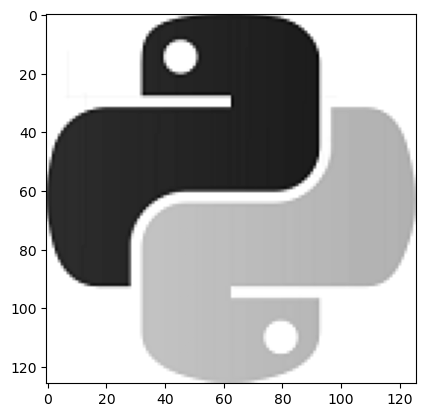

In [4]:
plt.imshow(img2gray, cmap='gray')
plt.show()


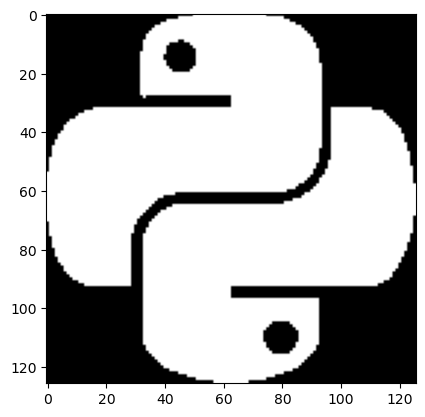

In [10]:
### Thresholding
# make the logo black and white and reverse it (>=220 -> 255, else ->0)
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
plt.imshow(mask, cmap='gray')
plt.show()


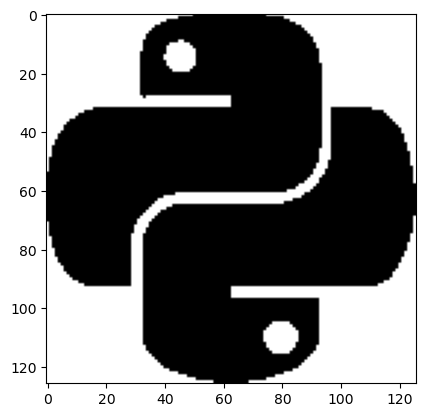

In [11]:
# inverse of the mask
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')
plt.show()


In [18]:
# background of image 1, foreground of image 2
img1_bg = cv2.bitwise_or(roi, roi, mask=mask_inv)
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)


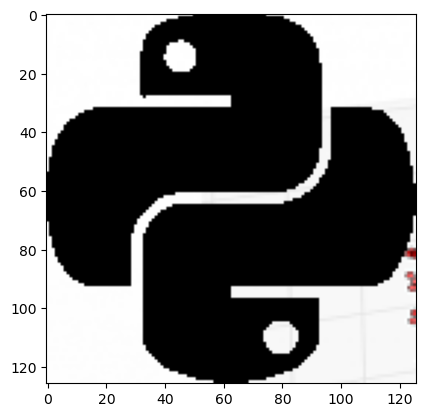

In [26]:
# inverse of the mask
plt.imshow(img1_bg)
plt.show()


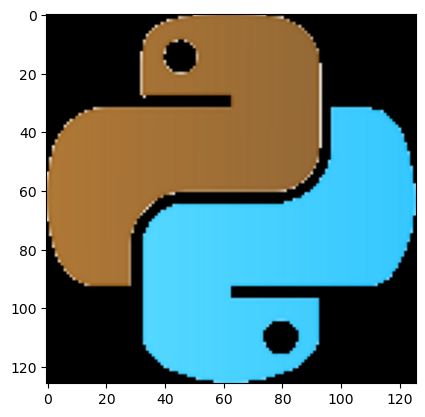

In [22]:
# inverse of the mask
plt.imshow(img2_fg)
plt.show()


In [32]:
dst = cv2.add(img1_bg, img2_fg)


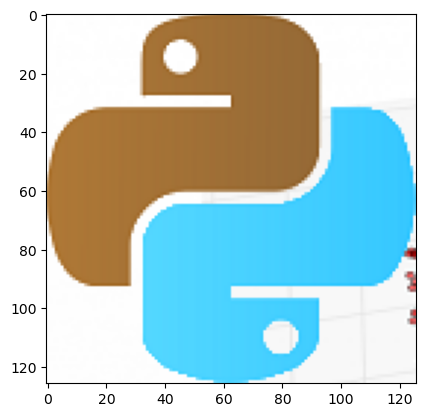

In [33]:
# inverse of the mask
plt.imshow(dst)
plt.show()


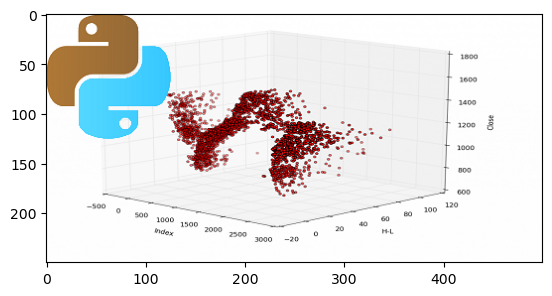

In [31]:
img1[0:rows, 0:cols] = dst
plt.imshow(img1, cmap='gray')
plt.show()
